In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import geopy
import pickle
import ML_util as util

In [155]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="tayun")

# Problem 1: Data Acquisition and Analysis

This problem deals with crime reporting data from Chicago. Your task is to download
data about Crime Reports from the Chicago Open Data Portal and analyze it to better
understand what type of crimes get reported in what (type of) neighborhoods.

1. Download reported crime data from the Chicago open data portal for 2017 and 2018.


Crime reporting data from Chicago Open Data Portal (2017, 2018) is downloaded and loaded, the data
has been cleaned in the ML_integrating.py file, 3112, 2698 of rows are dropped respectively
in 2017 and 2018 because of the missing information in their community or location. The
influence from the missing variables is expected to be negligible comparing to their original
numbers of rows (268094 and 266246).

In [156]:
crime17 = pd.read_csv(r"crime17_cleaned.csv")
crime18 = pd.read_csv(r"crime18_cleaned.csv")

2. Generate summary statistics for the crime reports data including but not limited to
number of crimes of each type, how they change over time, and how they are
different by neighborhood. Please use a combination of tables and graphs to
present these summary stats.

By implementing the gen_community_crime_type_df function in ML_util.py file,
I am able to get the information of the number of occurances of severe crime
defined by Chicago Police Department (2016) in each community. The following table is 
an example for the first 10 communities in 2017. We can observe that the frequency
of crime varies between communities and categories.

In [159]:
util.gen_community_crime_type_df(crime17).iloc[:10]

C:\Users\Yang Ta Yun\ML_util.py:18: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  df_type_com = df.groupby(("Community Area", "Primary Type")).size()


Primary Type,CRIM SEXUAL ASSAULT,HOMICIDE,ROBBERY,ASSAULT,BURGLARY,BATTERY,MOTOR VEHICLE THEFT,ARSON
Community Area,,,,,,,,
0,0,0,0,1,0,0,0,0
1,30,4,168,266,182,702,122,1
2,17,2,115,241,193,588,193,1
3,45,5,103,275,160,660,105,1
4,18,1,63,123,109,288,86,2
5,10,0,52,59,126,114,58,1
6,49,0,236,209,317,758,206,2
7,26,1,148,133,210,375,176,1
8,97,5,413,459,239,1386,333,6


Number of occurances for each type of crime in 2017 is presented in the table below. We can observe that theft, battery, and criminal damage have the highest frequencies.

In [164]:
crime17.groupby("Primary Type").size().sort_values(ascending=False)

Primary Type
THEFT                                63585
BATTERY                              49137
CRIMINAL DAMAGE                      28955
ASSAULT                              19252
DECEPTIVE PRACTICE                   17768
OTHER OFFENSE                        16965
BURGLARY                             12947
ROBBERY                              11869
NARCOTICS                            11475
MOTOR VEHICLE THEFT                  11367
CRIMINAL TRESPASS                     6799
WEAPONS VIOLATION                     4682
OFFENSE INVOLVING CHILDREN            2145
CRIM SEXUAL ASSAULT                   1541
PUBLIC PEACE VIOLATION                1496
INTERFERENCE WITH PUBLIC OFFICER      1083
SEX OFFENSE                            939
PROSTITUTION                           734
HOMICIDE                               676
ARSON                                  444
GAMBLING                               191
LIQUOR LAW VIOLATION                   191
KIDNAPPING                             19

By implementing the depict_top_n_community function in ML_util.py file,
The 5 communities with highest number of occurances of Homicide and Robbery
are presented repectively. We can discover that community 25, and 43 have
high frequency in both of the cases.

In [165]:
util.depict_top_n_community(crime17, 5, "HOMICIDE").sort_values("Count", ascending=False)

C:\Users\Yang Ta Yun\ML_util.py:38: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  df_depict = df.groupby(("Community Area", "Primary Type")).size().to_frame().\


,Community Area,Primary Type,Count
1,25,HOMICIDE,82
2,29,HOMICIDE,43
4,49,HOMICIDE,36
3,43,HOMICIDE,33
0,23,HOMICIDE,30


In [166]:
util.depict_top_n_community(crime17, 5, "ROBBERY").sort_values("Count", ascending=False)

C:\Users\Yang Ta Yun\ML_util.py:38: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  df_depict = df.groupby(("Community Area", "Primary Type")).size().to_frame().\


,Community Area,Primary Type,Count
2,25,ROBBERY,831
4,43,ROBBERY,466
3,28,ROBBERY,458
1,24,ROBBERY,425
0,8,ROBBERY,413


In order to discover the distribution and general patterns of crime in communities, function plot_top_n_community is provided in ML_util.py file. We can observe that for the severe crime types in 2017, battery and assult have the highest number of occurances in most of the communities. Moreover, in almost every category of severe crimes, community 25 has the highest number of occurances in 2017

C:\Users\Yang Ta Yun\ML_util.py:56: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  df_depict = df.groupby(("Community Area", "Primary Type")).size().to_frame().\


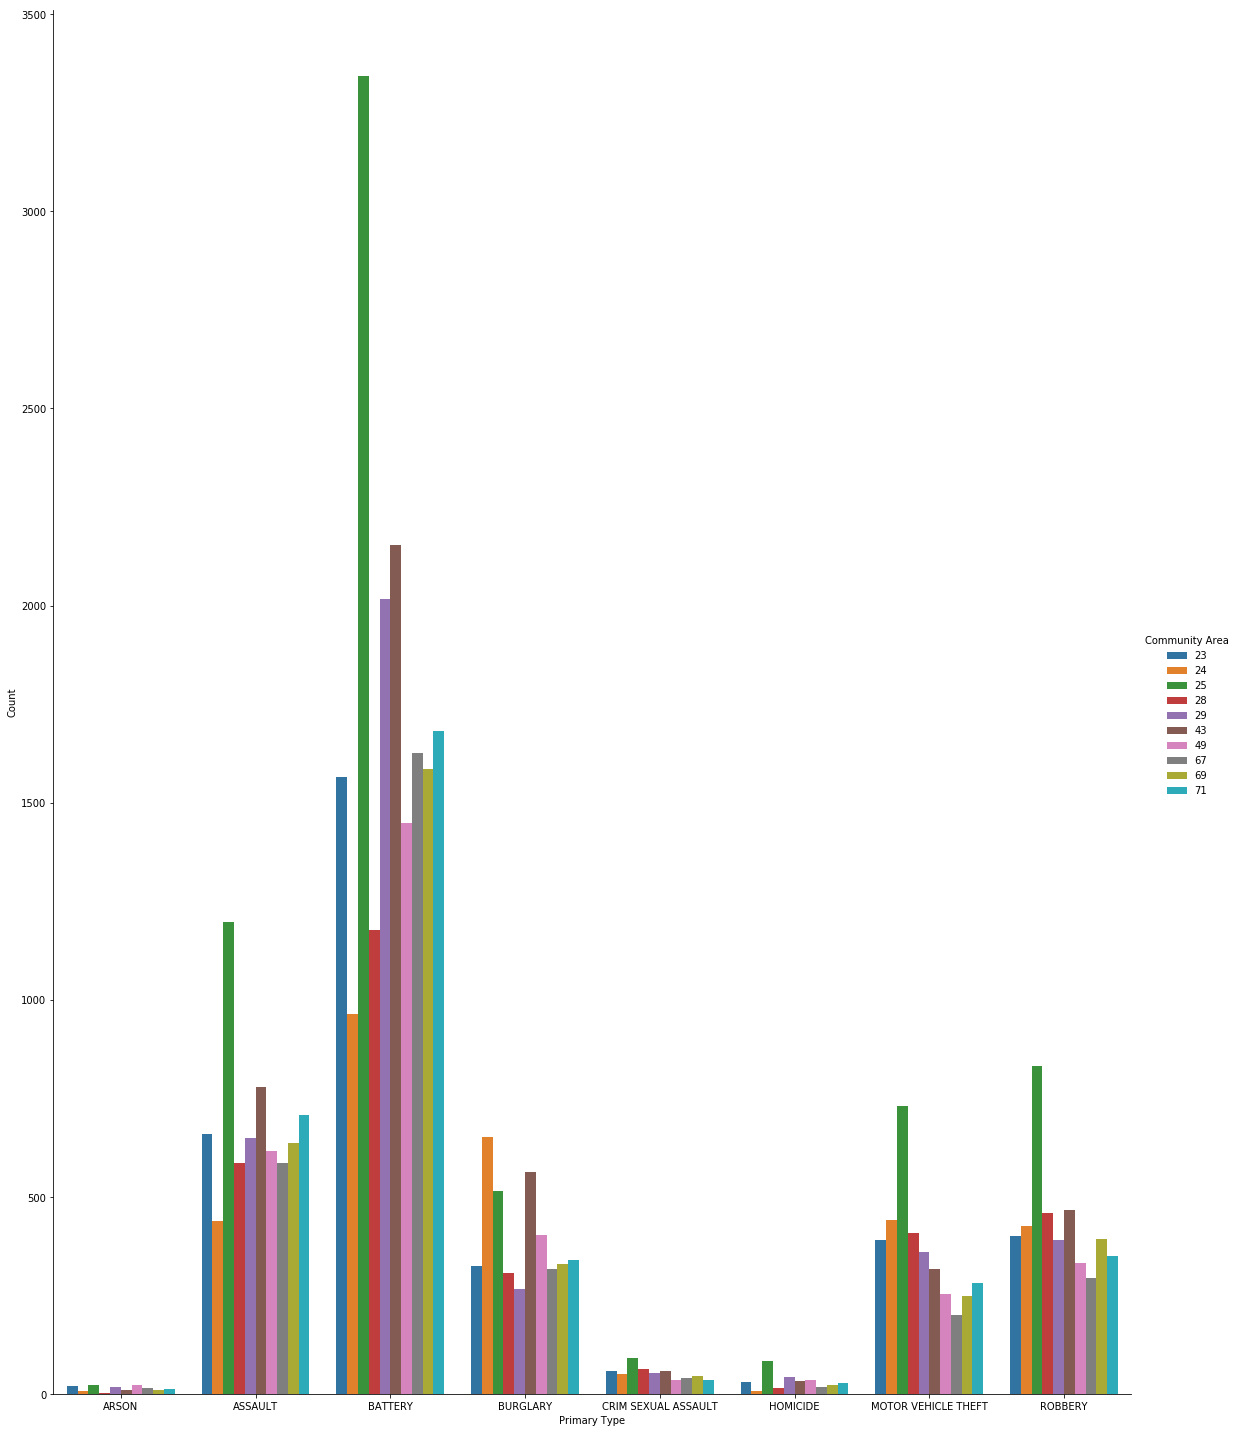

In [167]:
util.plot_top_n_community(crime17, 10, util.MAIN_CRIMES)

In order to make comparison between different years, the function compare_crime_change_in_community in ML_util.py is used. I calculate the difference in number of occurances of specific crime type in the unit of community area. The histogram presented below is the distribution of the changes in two years. We can observe that in general, there are more communities encountered  increase in battery comparing to decrease and no change,  and there are more communities encountered decrease in burglary comparing to increase and no change from 2017 to 2018.

We can also observe the general percentage change in every category of crime by using compute_crime_change_in_type function in ML_util.py. We can see that the fluctuations varies between categories of crime.

C:\Users\Yang Ta Yun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'Community Area' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


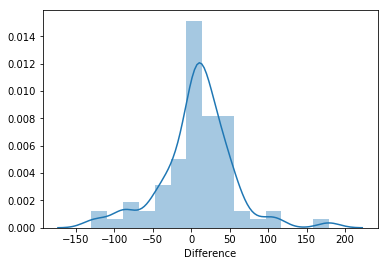

In [171]:
util.compare_crime_change_in_community(crime17, crime18, "BATTERY")[1]

C:\Users\Yang Ta Yun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'Community Area' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


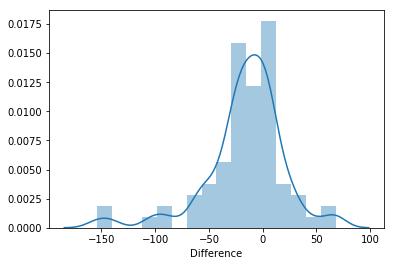

In [172]:
util.compare_crime_change_in_community(crime17, crime18, "BURGLARY")[1]

In [173]:
util.compute_crime_change_in_type(crime17, crime18)

,Count17,Count18,Difference_rate
Primary Type,,,
ARSON,444,372,-0.162162
ASSAULT,19252,20341,0.056566
BATTERY,49137,49720,0.011865
BURGLARY,12947,11687,-0.097320
CONCEALED CARRY LICENSE VIOLATION,69,148,1.144928
CRIM SEXUAL ASSAULT,1541,1588,0.030500
CRIMINAL DAMAGE,28955,27700,-0.043343
CRIMINAL TRESPASS,6799,6881,0.012061
DECEPTIVE PRACTICE,17768,17863,0.005347


# Problem 2: Data Augmentation and APIs
All of the crime data you just analyzed have a block address and lat/long fields. The task
now is to augment that data with American Community Survey data. For each crime
report, use one of the census APIs to get some additional data (at least 3-4 useful
variables) about the block or zipcode where the crime report came from. This could
include information about demographics of the block or zipcode (race, income, family
size, etc.). 

I apply the American Fact Finder API from United States Census Bureau (https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml) to find latest survey data of 2017 ACS 5-year estimates (U.S. Census Bureau, 2017) with zipcode as unit. I include variables like population, White population, African American population, median income, percentage of household under poverty line, gini index, labor participation rate and unemployment rate of every zipcode unit in Cook County in my data. Those datasets are integrated by using select_ACS_df function in ML_integrating.py file and generate ACS_df.csv, and ACS_df_metro.csv datasets. In order to match the geographical information in crime data (coordinates) with the zipcode information in ACS datasets, I apply an API geopy to map coordinates to address. And then, I extract the zipcode information from the address using regular expression methods and merge ACS datasets with crime datasets. 

Considering the huge amount of time using geocoding methods, I select 3 communities which have the highest frequency of each selected crime type in this quesion (homocide, battery, sex offense, and deceptive practice). Among those communities, I sample 10 cases in each community in a given crime type if the total number of cases in it exceeded 10. Given the fact that a single community may contains more than one zipcode and there are cases sampled which has the same zipcode, I drop duplicate zipcodes in a chosen community in specific crime categories. These processes were done by search_multiple_crime_type function and related helper functions in ML_util.py file. Finally, the output dataframes are saved in files Homicide3_17, Homicide3_18...

In [174]:
ACS_df = pd.read_csv("ACS_df.csv")
ACS_df_metro = pd.read_csv("ACS_df_metro.csv")

crime_type_dict3_17 = util.search_multiple_crime_type(crime17, 3, \
                        ["HOMICIDE", "BATTERY", "SEX OFFENSE", "DECEPTIVE PRACTICE"], ACS_df)
crime_type_dict3_18 = util.search_multiple_crime_type(crime18, 3, \
                        ["HOMICIDE", "BATTERY", "SEX OFFENSE", "DECEPTIVE PRACTICE"], ACS_df)

crime_type_dict3_17["HOMICIDE"].drop_duplicates("zipcode", keep="first").to_pickle("Homicide3_17")
crime_type_dict3_17["BATTERY"].drop_duplicates("zipcode", keep="first").to_pickle("Battery3_17")
crime_type_dict3_17["DECEPTIVE PRACTICE"].drop_duplicates("zipcode", keep="first").to_pickle("Deceptive Practice3_17")
crime_type_dict3_17["SEX OFFENSE"].drop_duplicates("zipcode", keep="first").to_pickle("Sex Offense3_17")

crime_type_dict3_18["HOMICIDE"].drop_duplicates("zipcode", keep="first").to_pickle("Homicide3_18")
crime_type_dict3_18["BATTERY"].drop_duplicates("zipcode", keep="first").to_pickle("Battery3_18")
crime_type_dict3_18["DECEPTIVE PRACTICE"].drop_duplicates("zipcode", keep="first").to_pickle("Deceptive Practice3_18")
crime_type_dict3_18["SEX OFFENSE"].drop_duplicates("zipcode", keep="first").to_pickle("Sex Offense3_18")

In order to compare the following cases, the characteristics of Great Chicago Area is provided.

In [175]:
Chicago_metro = ACS_df_metro[ACS_df_metro["name"]=="Chicago-Naperville-Elgin, IL-IN-WI Metro Area"]
Chicago_metro

,Unnamed: 0,zipcode,name,population,median_income,White,African American,gini_index,labor_participation,unemployment,poverty_rate
167,167,16980,"Chicago-Naperville-Elgin, IL-IN-WI Metro Area",9549229,65757,6303072,1599415,0.483,66.9,6.9,9.7


1. What types of blocks have reports of “Battery”?

By comparing the high-frequency communities (zipcode units) with Great Chicago Area, we can discover that the communities with above-avergae unemployment rate, poverty rate, and below-average labor participation rate, median income have higher tendency of battery. Moreover, the information from race and gini index are more ambiguous in this case.

In [176]:
# Characteristics for 2017
pd.read_pickle("Battery3_17")[["Community Area", "Primary Type", "zipcode", 'population','median_income', 'White', 
                              'African American', 'gini_index', 'labor_participation', 'unemployment', 'poverty_rate'\
                               ]].sort_values("Community Area")

,Community Area,Primary Type,zipcode,population,median_income,White,African American,gini_index,labor_participation,unemployment,poverty_rate
0,25,BATTERY,60644,49051,27617,1921,45059,0.4978,51.8,11.8,27.9
2,25,BATTERY,60639,90767,41307,33698,12024,0.4268,66.2,6.2,21.4
5,25,BATTERY,60302,32096,83145,21881,6569,0.5205,70.2,11.9,5.9
7,25,BATTERY,60651,61828,36283,9164,32826,0.4714,59.6,9.3,26.3
10,29,BATTERY,60623,88586,31445,35630,28401,0.4399,57.8,13.4,32.3
16,29,BATTERY,60612,35332,38756,9055,21980,0.5504,60.7,13.3,26.6
19,29,BATTERY,60652,43582,65770,11459,20510,0.3788,67.7,8.2,9.3
20,43,BATTERY,60617,81227,38417,30899,45555,0.4573,59.0,14.7,19.5
22,43,BATTERY,60649,44223,24941,1595,41337,0.5603,57.7,18.1,31.5


In [177]:
# Characteristics for 2018
pd.read_pickle("Battery3_18")[["Community Area", "Primary Type", "zipcode", 'population','median_income', 'White', 
                              'African American', 'gini_index', 'labor_participation', 'unemployment', 'poverty_rate'\
                               ]].sort_values("Community Area")

,Community Area,Primary Type,zipcode,population,median_income,White,African American,gini_index,labor_participation,unemployment,poverty_rate
0,25,BATTERY,60651,61828,36283,9164,32826,0.4714,59.6,9.3,26.3
2,25,BATTERY,60644,49051,27617,1921,45059,0.4978,51.8,11.8,27.9
4,25,BATTERY,60639,90767,41307,33698,12024,0.4268,66.2,6.2,21.4
7,25,BATTERY,60402,63963,60045,40087,3474,0.4019,67.8,7.7,9.2
10,29,BATTERY,60624,37665,22467,1320,34773,0.5407,48.0,12.7,38.2
11,29,BATTERY,60623,88586,31445,35630,28401,0.4399,57.8,13.4,32.3
20,43,BATTERY,60649,44223,24941,1595,41337,0.5603,57.7,18.1,31.5
24,43,BATTERY,60617,81227,38417,30899,45555,0.4573,59.0,14.7,19.5
28,43,BATTERY,60619,62992,32558,955,60687,0.4946,58.7,14.1,22.7


2. What types of blocks get “Homicide”?

Similar to the case of battery, we can discover that the communities with above-average unemployment rate, poverty rate, and below-average labor participation rate, median income have higher tendency of homicide. Moreover, the information from race and gini index are also more ambiguous in this case.

In [178]:
# Characteristics for 2017
pd.read_pickle("Homicide3_17")[["Community Area", "Primary Type", "zipcode", 'population','median_income', 'White', 
                              'African American', 'gini_index', 'labor_participation', 'unemployment', 'poverty_rate'\
                               ]].sort_values("Community Area")

,Community Area,Primary Type,zipcode,population,median_income,White,African American,gini_index,labor_participation,unemployment,poverty_rate
0,25,HOMICIDE,60639,90767,41307,33698,12024,0.4268,66.2,6.2,21.4
1,25,HOMICIDE,60644,49051,27617,1921,45059,0.4978,51.8,11.8,27.9
3,25,HOMICIDE,60651,61828,36283,9164,32826,0.4714,59.6,9.3,26.3
10,29,HOMICIDE,60652,43582,65770,11459,20510,0.3788,67.7,8.2,9.3
11,29,HOMICIDE,60623,88586,31445,35630,28401,0.4399,57.8,13.4,32.3
18,29,HOMICIDE,60624,37665,22467,1320,34773,0.5407,48.0,12.7,38.2
20,49,HOMICIDE,60628,67942,38206,2889,63906,0.4826,58.0,17.3,22.3
22,49,HOMICIDE,60617,81227,38417,30899,45555,0.4573,59.0,14.7,19.5
28,49,HOMICIDE,60643,51028,59488,11458,37272,0.4815,59.0,9.6,12.6


In [179]:
pd.read_pickle("Homicide3_18")[["Community Area", "Primary Type", "zipcode", 'population','median_income', 'White', 
                              'African American', 'gini_index', 'labor_participation', 'unemployment', 'poverty_rate'\
                               ]].sort_values("Community Area")

,Community Area,Primary Type,zipcode,population,median_income,White,African American,gini_index,labor_participation,unemployment,poverty_rate
0,25,HOMICIDE,60644,49051,27617,1921,45059,0.4978,51.8,11.8,27.9
1,25,HOMICIDE,60639,90767,41307,33698,12024,0.4268,66.2,6.2,21.4
5,25,HOMICIDE,60651,61828,36283,9164,32826,0.4714,59.6,9.3,26.3
10,29,HOMICIDE,60623,88586,31445,35630,28401,0.4399,57.8,13.4,32.3
14,29,HOMICIDE,60624,37665,22467,1320,34773,0.5407,48.0,12.7,38.2
18,29,HOMICIDE,60608,78877,41226,37203,14147,0.4676,56.5,8.2,20.0
20,68,HOMICIDE,60620,69195,33304,1100,66537,0.4839,55.9,16.6,23.4
21,68,HOMICIDE,60621,30496,19845,605,29020,0.5355,50.3,22.2,42.7
24,68,HOMICIDE,60636,34461,27573,937,31378,0.4887,52.9,20.7,30.1


3. Does that change over time in the data you collected?

In both of the cases (battery and homicide), communities with highest frequency in 2017 remain the ones with highest number of crime occurances in 2018. Despite the fact that we are not able to detect the variation of the survey data since they are all based on the latest information from 2017 (information for 2018 is not available), we have to assume that the changes in demographic might not be dramatic in a year.

4. What is the difference in blocks that get “Deceptive Practice” vs “Sex Offense”?

If we only compare the communities which have the highest frenquency of sex offense and deceptive practice which are community 25 and 8 respectively, we will discover the huge difference between them. Community 25 has lower-than-average median income and labor participation, and higher-than-average poverty rate and unemployment rate. On the contrary, community 8 has higher-than-average median income and labor participation rate, and lower-than-average poverty rate and unemployment. The second highest-frequency cases in deceptive practice (community 32) has similar patterns as community 8. However, second highest-frequency case in sex offense is community 8 as well, this may due to the fact that the absolute number and difference in counts of each communities in sex offense case are smaller. Thus, the pattern is more ambiguous in sex offense cases. 

In [180]:
util.depict_top_n_community(crime17, 3, "SEX OFFENSE").sort_values("Count", ascending=False)

C:\Users\Yang Ta Yun\ML_util.py:38: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  df_depict = df.groupby(("Community Area", "Primary Type")).size().to_frame().\


,Community Area,Primary Type,Count
2,25,SEX OFFENSE,44
0,8,SEX OFFENSE,35
1,23,SEX OFFENSE,31


In [181]:
# Characteristics for 2017
pd.read_pickle("Sex Offense3_17")[["Community Area", "Primary Type", "zipcode", 'population','median_income', 'White', 
                              'African American', 'gini_index', 'labor_participation', 'unemployment', 'poverty_rate'\
                               ]].sort_values("Community Area")

,Community Area,Primary Type,zipcode,population,median_income,White,African American,gini_index,labor_participation,unemployment,poverty_rate
0,8,SEX OFFENSE,60642,19488,92797,13781,1756,0.4362,85.3,12.5,7.5
1,8,SEX OFFENSE,60610,39345,81576,28847,6720,0.5496,74.8,4.0,7.4
3,8,SEX OFFENSE,60611,32198,96040,24530,1069,0.5447,67.2,3.1,4.4
6,8,SEX OFFENSE,60654,18148,104629,14358,833,0.4875,85.6,4.2,0.0
10,23,SEX OFFENSE,60651,61828,36283,9164,32826,0.4714,59.6,9.3,26.3
11,23,SEX OFFENSE,60624,37665,22467,1320,34773,0.5407,48.0,12.7,38.2
13,23,SEX OFFENSE,60641,69954,56488,46882,1685,0.4443,69.9,4.3,11.5
18,23,SEX OFFENSE,60639,90767,41307,33698,12024,0.4268,66.2,6.2,21.4
20,25,SEX OFFENSE,60644,49051,27617,1921,45059,0.4978,51.8,11.8,27.9
21,25,SEX OFFENSE,60302,32096,83145,21881,6569,0.5205,70.2,11.9,5.9


In [182]:
util.depict_top_n_community(crime17, 3, "DECEPTIVE PRACTICE").sort_values("Count", ascending=False)

C:\Users\Yang Ta Yun\ML_util.py:38: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  df_depict = df.groupby(("Community Area", "Primary Type")).size().to_frame().\


,Community Area,Primary Type,Count
0,8,DECEPTIVE PRACTICE,1730
2,32,DECEPTIVE PRACTICE,1504
1,25,DECEPTIVE PRACTICE,760


In [183]:
pd.read_pickle("Deceptive Practice3_17")[["Community Area", "Primary Type", "zipcode", 'population','median_income', 'White', 
                              'African American', 'gini_index', 'labor_participation', 'unemployment', 'poverty_rate'\
                               ]].sort_values("Community Area")

,Community Area,Primary Type,zipcode,population,median_income,White,African American,gini_index,labor_participation,unemployment,poverty_rate
0,8,DECEPTIVE PRACTICE,60642,19488,92797,13781,1756,0.4362,85.3,12.5,7.5
1,8,DECEPTIVE PRACTICE,60610,39345,81576,28847,6720,0.5496,74.8,4.0,7.4
2,8,DECEPTIVE PRACTICE,60654,18148,104629,14358,833,0.4875,85.6,4.2,0.0
3,8,DECEPTIVE PRACTICE,60611,32198,96040,24530,1069,0.5447,67.2,3.1,4.4
10,25,DECEPTIVE PRACTICE,60651,61828,36283,9164,32826,0.4714,59.6,9.3,26.3
12,25,DECEPTIVE PRACTICE,60644,49051,27617,1921,45059,0.4978,51.8,11.8,27.9
14,25,DECEPTIVE PRACTICE,60639,90767,41307,33698,12024,0.4268,66.2,6.2,21.4
20,32,DECEPTIVE PRACTICE,60604,668,114565,418,42,0.5607,74.5,0.0,10.7
21,32,DECEPTIVE PRACTICE,60602,1277,115774,976,11,0.5078,78.8,5.1,0.0
25,32,DECEPTIVE PRACTICE,60601,13887,110215,10384,1148,0.5131,70.3,6.1,2.7


# Problem 3: Analysis and Communication
1. Describe how crime has changed in Chicago from 2017 to 2018?

In comparison between crime trend between 2017 and 2018, there is some part worth mentioning in the following table and graphs. First of all, we observe a higher-than 10% annual increase in crime types like interference with public officer, narcotics, sex offense and weapon violation, and a higher-than 10% annual decrease in crime types like arson, homiside, motor vehicle rheft, and robbery. Although crime types like intimidation, liquor law violation, kidnapping, public indecency, concealed carry license violation, and human trafficing also have fluctuation more than 10%, the total number of occurances is small comparing to others.

I also provide some examples in community level. For crime types like assault and battery, there are, in general, more communities encounter increase in cases. For crime types like deceptive practice and homicide, the number of communities which encounter increase in occurances is similar to which encounter decrease.

In [184]:
util.compute_crime_change_in_type(crime17, crime18)

,Count17,Count18,Difference_rate
Primary Type,,,
ARSON,444,372,-0.162162
ASSAULT,19252,20341,0.056566
BATTERY,49137,49720,0.011865
BURGLARY,12947,11687,-0.097320
CONCEALED CARRY LICENSE VIOLATION,69,148,1.144928
CRIM SEXUAL ASSAULT,1541,1588,0.030500
CRIMINAL DAMAGE,28955,27700,-0.043343
CRIMINAL TRESPASS,6799,6881,0.012061
DECEPTIVE PRACTICE,17768,17863,0.005347


C:\Users\Yang Ta Yun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'Community Area' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


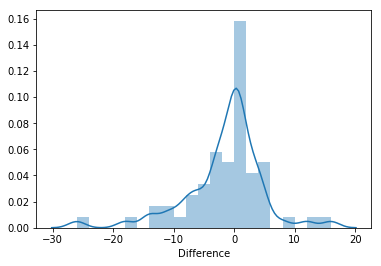

In [185]:
util.compare_crime_change_in_community(crime17, crime18, "HOMICIDE")[1]

C:\Users\Yang Ta Yun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'Community Area' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


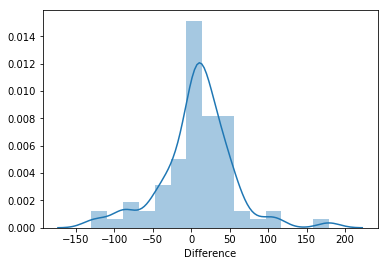

In [186]:
util.compare_crime_change_in_community(crime17, crime18, "BATTERY")[1]

C:\Users\Yang Ta Yun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'Community Area' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


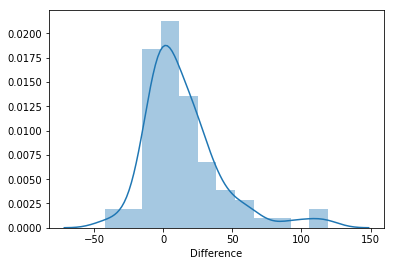

In [187]:
util.compare_crime_change_in_community(crime17, crime18, "ASSAULT")[1]

C:\Users\Yang Ta Yun\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 'Community Area' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  if __name__ == '__main__':


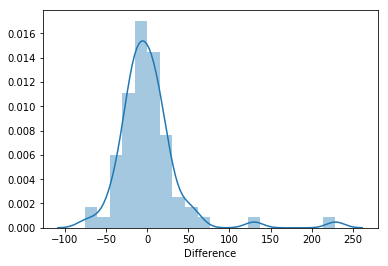

In [188]:
util.compare_crime_change_in_community(crime17, crime18, "DECEPTIVE PRACTICE")[1]

2. One of the alderman candidates from recent elections has some crime statistics on
his website: https://www.ringer4results.com/node/8


Specifically:
Crime is a major issue in our neighborhoods over the last four years, and
the data shows just that.
Let’s break down the Chicago Police Department’s report for the month
leading up to July 26, 2018, compared to the same week in 2017:


• Robberies -- up 21 percent over the same time-frame in 2017
<br>
• Aggravated batteries -- up 136 percent
<br>
• Burglaries -- an increase of 50 percent
<br>
• Motor vehicle theft -- up 41 percent.


All told, crime rose 16 percent in the same 28-day time period in just one
year. But take a look at the year-to-date number and you’ll see how crime
has affected our local neighborhoods in a four-year period:


• Rose 10 percent since 2017
<br>
• Rose 22 percent since 2016

A. Are these statistics correct?

I compare the same week (7/20-7/26) and same month (7/01-7/26) between 2017 and 2018, but I am not able to reporduce the result the author has claim for individual crime types. Moreover, the sample size of specific crime types is too small to make a robust claim since the percentage may have huge change with a unit variation in theses cases. If we compare the total number of crime occurances in the same month between 2017 and 2018, it's true that the number has increased 10 percent since 2017.

In [189]:
crime17["month"] = crime17.apply(lambda x: x["Date"][:2], axis=1)
crime17["date"] = crime17.apply(lambda x: x["Date"][3:5], axis=1)
crime17["date"] = crime17["date"].astype(int)
crime18["month"] = crime18.apply(lambda x: x["Date"][:2], axis=1)
crime18["date"] = crime18.apply(lambda x: x["Date"][3:5], axis=1)
crime18["date"] = crime18["date"].astype(int)

In [190]:
July17 = crime17[(crime17["month"] == "07") & (crime17["date"] <= 26)]
July18 = crime18[(crime18["month"] == "07") & (crime18["date"] <= 26)]
July17 = July17[July17["date"] >= 20]
July18 = July18[July18["date"] >= 20]
July17_43 = July17[July17["Ward"] == 43]
July18_43 = July18[July18["Ward"] == 43]

In [191]:
diff_week = util.compute_crime_change_in_type(July17_43, July18_43)
diff_week

,Count17,Count18,Difference_rate
Primary Type,,,
BATTERY,16,11,-0.312500
BURGLARY,3,3,0.000000
CRIMINAL DAMAGE,10,8,-0.200000
CRIMINAL TRESPASS,2,3,0.500000
DECEPTIVE PRACTICE,9,7,-0.222222
MOTOR VEHICLE THEFT,3,2,-0.333333
OFFENSE INVOLVING CHILDREN,2,1,-0.500000
OTHER OFFENSE,1,3,2.000000
ROBBERY,2,4,1.000000


In [192]:
(sum(diff_week["Count18"]) - sum(diff_week["Count17"])) / sum(diff_week["Count17"])

-0.041237113402061855

In [193]:
July17 = crime17[(crime17["month"] == "07") & (crime17["date"] <= 26)]
July18 = crime18[(crime18["month"] == "07") & (crime18["date"] <= 26)]
July17_43 = July17[July17["Ward"] == 43]
July18_43 = July18[July18["Ward"] == 43]

In [194]:
diff_month = util.compute_crime_change_in_type(July17_43, July18_43)
diff_month

,Count17,Count18,Difference_rate
Primary Type,,,
ASSAULT,5,15,2.000000
BATTERY,38,30,-0.210526
BURGLARY,14,14,0.000000
CRIMINAL DAMAGE,24,25,0.041667
CRIMINAL TRESPASS,7,15,1.142857
DECEPTIVE PRACTICE,30,30,0.000000
MOTOR VEHICLE THEFT,6,10,0.666667
NARCOTICS,1,1,0.000000
OFFENSE INVOLVING CHILDREN,2,1,-0.500000


In [195]:
(sum(diff_month["Count18"]) - sum(diff_month["Count17"])) / sum(diff_month["Count17"])

0.10231023102310231

B. Could they be misleading or would you agree with the conclusions he’s drawing? Why or why not?

The conclusion is definitely misleading. First of all, the comparison of the same month of two different years is not very precise, since it assume that the month trend of crime occurances in different years are similar. Lots of crime in practice does not have clear time trend, and may have large proportion of random factors. Secondly, even though there is increase in total number of crime, the severity of a single crime types are different. For example, it is not appropriate that an unit variation in homicide case is seemed to be equilalent to an unit variation in theft. Finally, the difference in two years varies among crime categories, some of them are positive and some of them are negative. We should not only select the categories which increases over time and make the claim.

3. As you know, there will be a new mayor in Chicago very soon. Based on these
summary statistics, provide 5 key findings to the new mayor’s office about crime
in Chicago and what they should focus on in order to deal with crime in Chicago.


a. The frequency of crime occurances varies significantly between communities.


b. The frequency of crime occurances varies within communities. I observed that even in a single community, the region with zipcode may have totally different demographic and economic characteristics.


c. In general, severe crime like battery and homicide are expected to have higher tendency in the communities with low median income and labor participation rate, and high poverty rate and unemployment.


d. Some of the crime type, like deceptive practive, may violate the general pattern. Non-economic factors are more influential in some cases.


e. Some community, like community 25 ranks top 3 in number of occurances of every crime type.


In general, policy targeting specific communities may be more effective than general policies to all regions in Chicago and we should also concern the non-economic factor embedded in the incentives of crime commission.

4. What are some of the key caveats of your recommendations and limitations of the
analysis that you just did?

First of all, all of the analysis in this report is done by the observation of summary statistics, and we are not able to imply casulity from correlation without robust methods. For example, it's true that we observe that region with worse economic situation might have higher tendency of crime occurances, but we cannot conclude that poverty causes crime. It's possible that crime activities worsen the economic situation in the communities, or there are other unobservable factors that influence crime commission. Secondly, we only analysis the data from two years, which is not enough to observe the long term trend in Chicago. Biases may be caused by ignoring scrutural changes in the society in many years.

# Problem 4
Assume you are running the 911 call center for Chicago. You get a call from someone at
2111 S Michigan Ave

In [196]:
geolocator.geocode("2111 S Michigan Ave, Chicago")

Location(Michigan Ave, South Loop, Chicago, Cook County, Illinois, USA, (41.8909159, -87.6240442979765, 0.0))

In [197]:
geolocator.reverse("41.8909159, -87.6240442979765")

Location(Lower Michigan & Illinois NB, North Michigan Avenue, Michigan Ave, South Loop, Chicago, Cook County, Illinois, 60601, USA, (41.8907952, -87.6240672, 0.0))

A. Of the types of crimes you have data for, which crime type is the most likely
given the call came from 2111 S Michigan Ave? What are the probabilities for
each type of request?

In the previous dataset I have generated by geocoding, I know that zopcode 60601 is located in community 32. Accroding to the crime occurances in different types divided by the total crime occurances, theft has the highest probability of 0.531. 

In [198]:
crime18[crime18["Community Area"] == 32].groupby("Primary Type").size() / \
sum(crime18[crime18["Community Area"] == 32].groupby("Primary Type").size())

Primary Type
ARSON                                0.000281
ASSAULT                              0.044534
BATTERY                              0.096287
BURGLARY                             0.006938
CONCEALED CARRY LICENSE VIOLATION    0.000094
CRIM SEXUAL ASSAULT                  0.004219
CRIMINAL DAMAGE                      0.043503
CRIMINAL TRESPASS                    0.027283
DECEPTIVE PRACTICE                   0.153197
HOMICIDE                             0.000375
HUMAN TRAFFICKING                    0.000094
INTERFERENCE WITH PUBLIC OFFICER     0.001500
INTIMIDATION                         0.000281
KIDNAPPING                           0.000188
LIQUOR LAW VIOLATION                 0.001031
MOTOR VEHICLE THEFT                  0.011532
NARCOTICS                            0.008626
NON-CRIMINAL                         0.000094
OFFENSE INVOLVING CHILDREN           0.000656
OTHER OFFENSE                        0.025595
PROSTITUTION                         0.000094
PUBLIC INDECENCY     

B. Let’s now assume that a call comes in about Theft. Which is more likely – that the
call came from Garfield Park or Uptown? How much more or less likely is it to be
from Garfield Park vs Uptown?

If the call is about theft, accroding to the theft occurances in different communities divided by the total theft occurances, theft occurance has probability of 0.0085 in Uptown and 0.0031 in Garfield (Park) Ridge. It's more likely that the call is from Uptown. The information of the community name and number is extracted from City of Chicago Community Areas (City of Chicago, 2016).

In [202]:
# for Uptown 
(crime18[crime18["Primary Type"] == "THEFT"].groupby("Community Area").size() / \
 sum(crime18[crime18["Primary Type"] == "THEFT"].groupby("Community Area").size())).iloc[3]

0.0085280519805073091

In [203]:
# for Garfield (Park) Ridge
(crime18[crime18["Primary Type"] == "THEFT"].groupby("Community Area").size() / \
 sum(crime18[crime18["Primary Type"] == "THEFT"].groupby("Community Area").size())).iloc[56]

0.0030769711358240659

C. Now assume that you don’t have access to all the raw data and you know the
following things:

There are a total of 1000 calls, 600 from Garfield Park and 400 from Uptown. Of
the 600 calls from Garfield Park, 100 of them are about Battery. Of the 400 calls
from Uptown, 160 are about Battery. If a call comes about Battery, how much
more/less likely is it that the call came from Garfield Park versus Uptown? 

Prob(Garfield|Battery) = 100 / (100+160) = 0.385


Prob(Uptown|Battery) = 160 / (100+160) = 0.615

#### Dependency: 

pandas, numpy, seaborn, matplotlib.pyplot, re, geopy, pickle, American Fact Finder

#### Reference:

U.S. Census Bureau (2017). *2017 American Community Survey 5-year estimates*. Retrieved from https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml

Chicago Data Portal (2017). *Crimes-2017*. Retrived from https://data.cityofchicago.org/Public-Safety/Crimes-2017/d62x-nvdr

Chicago Data Portal (2018). *Crimes-2018*. Retrived from https://data.cityofchicago.org/Public-Safety/Crimes-2018/3i3m-jwuy

City of Chicago (2016). *City of Chicago Community Areas*. Retrived from https://www.chicago.gov/content/dam/city/depts/doit/general/GIS/Chicago_Maps/Community_Areas/Community_Areas_W_Numbers.pdf

Chicag Police Department (2018). *Crime Type Categories: Definition & Description*. Retrived from http://gis.chicagopolice.org/CLEARMap_crime_sums/crime_types.html#N06